1. 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

2. 모델 로드


1.  (nn_model_100.h5: mod_new.h5에 풍경화 신경전이 화풍 변환 그림 재학습)
2.  (people_40.h5: mod_new.h5에 단체사진 신경전이 화풍 변환 그림 재학습)
2.  (mod_new.h5: 다양한 그림 학습)
2.  (mod.h5: 기본모델)


In [ ]:
from scipy import ndimage
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import os
from collections import deque
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import plot_model
from skimage.util import invert

model_nn = load_model('/content/drive/MyDrive/딥러닝 팀플/nn_model_100.h5')
model_people = load_model('/content/drive/MyDrive/people_checkpoint/people_40.h5')
model_masterpiece = load_model('/content/drive/MyDrive/딥러닝 팀플/skech_keras/mod_new.h5')
model = load_model('/content/drive/MyDrive/딥러닝 팀플/skech_keras/mod.h5')
model_person = load_model('/content/drive/MyDrive/people_checkpoint/person_100.h5')

3. Canny 실행 함수

In [ ]:
def canny(image):
  # 엣지 감지 수행
  threshold1 = 100  # 첫 번째 임계값
  threshold2 = 200  # 두 번째 임계값
  edges = cv2.Canny(image, threshold1, threshold2)
  edges = invert(edges)
  return edges

Canny 결과


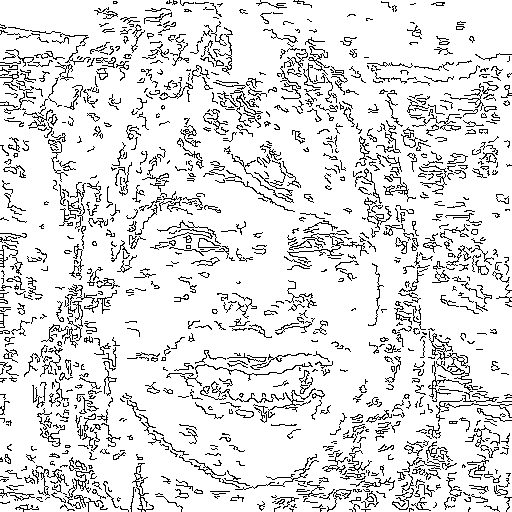

In [ ]:

new_size = (512, 512)
img = cv2.imread('/content/drive/MyDrive/img/style_transition_face_1.png' , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, new_size)
img = canny(img)

cv2_imshow(img)
#cv2.imwrite('/content/drive/MyDrive/{}.jpg'.format(i) ,prediction)


mod_new.h5: 다양한 그림 학습 결과


1/1 [==============================] - 2s 2s/step


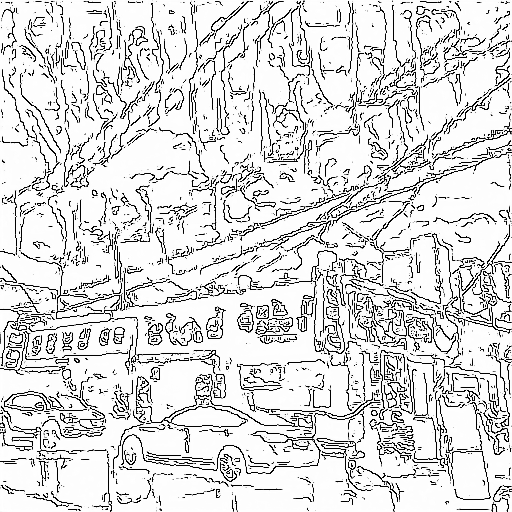

In [ ]:
new_size = (512, 512)
img = cv2.imread('/content/KakaoTalk_20230622_215048491.png' , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, new_size)


img = np.expand_dims(img, axis=0)


img = img.reshape(-1, 512,512,1)
prediction = model_masterpiece.predict(img)

prediction = prediction.reshape(512,512,1)
cv2_imshow(prediction)
#cv2.imwrite('/content/drive/MyDrive/{}.jpg'.format(i) ,prediction)


people_40.h5: mod_new.h5에 단체사진 신경전이 화풍 변환 그림 재학습 결과


1/1 [==============================] - 2s 2s/step


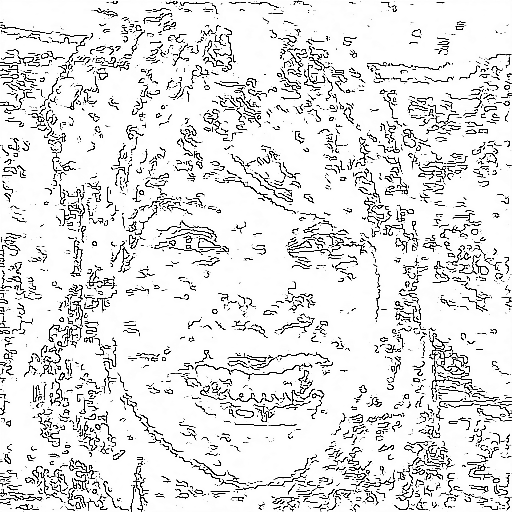

In [ ]:
new_size = (512, 512)
img = cv2.imread('/content/drive/MyDrive/딥러닝 팀플/img/style_transition_face_1.png' , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, new_size)

img = np.expand_dims(img, axis=0)


img = img.reshape(-1, 512,512,1)
prediction = model_people.predict(img)

prediction = prediction.reshape(512,512,1)
cv2_imshow(prediction)
#cv2.imwrite('/content/drive/MyDrive/{}.jpg'.format(i) ,prediction)


mod.h5: 기본모델 결과


In [ ]:
new_size = (512, 512)
img = cv2.imread('/content/drive/MyDrive/딥러닝 팀플/조선시대.jpg' , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, new_size)

img = np.expand_dims(img, axis=0)


img = img.reshape(-1, 512,512,1)
prediction = model.predict(img)

prediction = prediction.reshape(512,512,1)
prediction = prediction/255
img = show_active_img_and_save_denoise_filter2(prediction)

cv2_imshow(img)
#cv2.imwrite('/content/drive/MyDrive/{}.jpg'.format(i) ,prediction)

nn_model_100.h5: mod_new.h5에 풍경화 신경전이 화풍 변환 그림 재학습 결과


1/1 [==============================] - 2s 2s/step


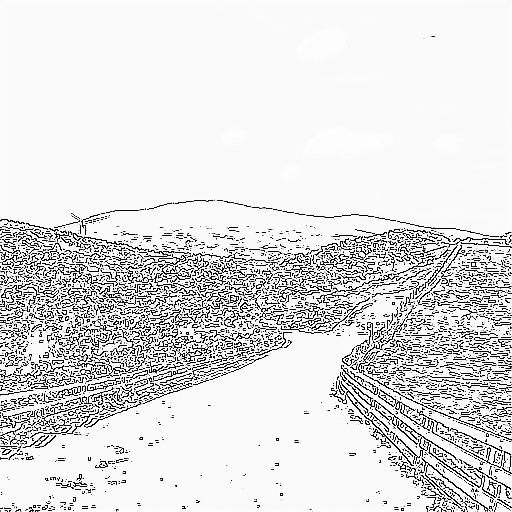

In [ ]:
new_size = (512, 512)
img = cv2.imread('/content/KakaoTalk_20230622_214721543.jpg' , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, new_size)

img = np.expand_dims(img, axis=0)

img = img.reshape(-1, 512,512,1)
prediction = model_nn.predict(img)

prediction = prediction.reshape(512,512,1)
cv2_imshow(prediction)
#cv2.imwrite('/content/drive/MyDrive/{}.jpg'.format(i) ,prediction)

인물 데이터 학습 결과

1/1 [==============================] - 2s 2s/step


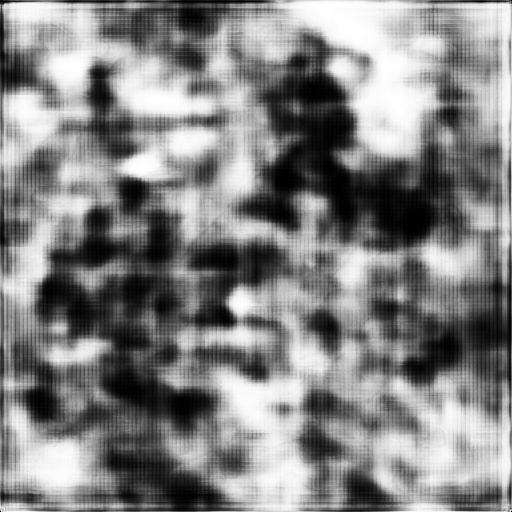

In [ ]:
new_size = (512, 512)
img = cv2.imread('/content/KakaoTalk_20230622_215102093.png' , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, new_size)

img = np.expand_dims(img, axis=0)

img = img.reshape(-1, 512,512,1)
prediction = model_person.predict(img)

prediction = prediction.reshape(512,512,1)
# 이미지 형식 변환 (8비트 단일 채널로)
prediction = prediction.astype(np.uint8)
# 이미지 대비 조정
prediction = cv2.equalizeHist(prediction)
cv2_imshow(prediction)
#cv2.imwrite('/content/drive/MyDrive/{}.jpg'.format(i) ,prediction)